In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# STORYTELLING with financial spendings.



**starting with a sample dataset**, we potentially want to investigate what insigths can be derived from a dataset concentrating ones spendings (Habits; trends etc.)
  
  ***with respect to time:***
 - How does the data differ from months to months
 - How does the data differ from summer vs. winter

therefore we differentiate the data regarding:
- fix vs. flexible costs
- basic need / luxoury ("nice to have") spendings

- are there any trends in the way money is spend?
- how does the absolute and relative spendings within the different categories differ?



# Data Inspection - unpreprocessed dataset

In [2]:
os.getcwd()
file_path01 = r"../data/cristina_dataset/Cristina_Dataset_230218.xlsx"
file_path02 = r"../data/cristina_dataset/Cristina_Dataset_230222.csv"



In [3]:
#read dataframe
df = pd.read_excel(file_path01)


In [4]:
#set up of the file
print(df.head(-5))
print("\n")
df.info()


       Category       Detail    Cost       Date
0    Eating Out       Brunch   15.00 2022-07-25
1      Shopping       Uniqlo  144.50 2022-07-25
2       Hobbies  Salsa Class  130.00 2022-07-27
3     Groceries    Groceries    6.78 2022-07-27
4    Eating Out       Ditsch    2.00 2022-07-27
..          ...          ...     ...        ...
301      Travel        Train   26.50 2023-02-03
302   Groceries    Groceries    8.94 2023-02-03
303    Shopping      Amarula   15.70 2023-02-04
304   Transport  Oslo ticket   30.19 2023-02-06
305   Transport  Oslo ticket   30.50 2023-02-13

[306 rows x 4 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Category  311 non-null    object        
 1   Detail    311 non-null    object        
 2   Cost      311 non-null    float64       
 3   Date      311 non-null    datetime64[ns]
dtypes: datetime64

In [5]:
print(df.Category.unique())
print("\n")
print(len(df.Category.unique()))
print("\n")
print(df.Detail.unique())


['Eating Out' 'Shopping' 'Hobbies' 'Groceries' 'Rent + Bills' 'Investment'
 'Transport' 'Student Loan' 'Travel' 'Healthcare' 'Selfcare']


11


['Brunch' 'Uniqlo' 'Salsa Class' 'Groceries' 'Ditsch'
 'Shared Rent + Bills expenses' 'Moving' 'Weekly ETH' 'Rent' 'BVG' 'Phone'
 'Postal re-route' 'Snacks' 'Bi-Weekly ETF' 'Stock' 'Passport photos'
 'Restaurant + Drinks' 'Salsa Festival Surcharge'
 'Driver license conversion' 'Student Loan' 'Sisyphos' 'Google' 'Patreon'
 'Insurance' 'Post salsa pizza' 'Pub Quiz' 'Flea market' 'Juice'
 'Poland Bus' 'Birthday present' 'Train castellvi' 'YEGO'
 'Pills pills pills ' 'Bi-Weekly Stock' 'Pills pills pills' 'Tampons'
 'Olive oil' 'Libro de la abuela' 'Spanish foooood' 'Taxi airport' 'Salsa'
 'Travel' 'Finger cut' 'Thai park' 'Baptism flight'
 'Train tickets to visit Fran' 'Teeth cleaning' 'Poland hotel' 'UK Phone'
 'Date' 'Salsa Festival' 'Extension ticket BVG' 'Extension ticket'
 'Avanico' 'Phone surcharge' 'Fruit' 'Hot water bottle' 'DM'
 'Vase and 

In [6]:
df[df["Category"]== "Investment"]

,Category,Detail,Cost,Date
11,Investment,Weekly ETH,6.0,2022-08-01
16,Investment,Weekly ETH,6.0,2022-07-25
17,Investment,Weekly ETH,10.0,2022-08-08
18,Investment,Weekly ETH,10.0,2022-08-15
19,Investment,Weekly ETH,10.0,2022-08-22
24,Investment,Bi-Weekly ETF,50.0,2022-08-16
25,Investment,Stock,10.0,2022-08-16
57,Investment,Weekly ETH,10.0,2022-08-29
58,Investment,Weekly ETH,10.0,2022-09-05
59,Investment,Weekly ETH,10.0,2022-09-12


# Data Inspection - preprocessed dataset

In [7]:
df01 = pd.read_csv(file_path02)

In [8]:
df01

,Category,Detail,Cost,Date
0,Eating Out,Brunch,€15.00,25-Jul-2022
1,Shopping,Uniqlo,€144.50,25-Jul-2022
2,Hobbies,Salsa Class,€130.00,27-Jul-2022
3,Groceries,Groceries,€6.78,27-Jul-2022
4,Eating Out,Ditsch,€2.00,27-Jul-2022
...,...,...,...,...
319,Groceries,Groceries,€4.07,20-Feb-2023
320,Eating Out,Lunch,€1.92,20-Feb-2023
321,Shopping,Ikea,€74.78,21-Feb-2023
322,Eating Out,Ikea,€9.59,21-Feb-2023


In [9]:
#Checking for NA values
df01.isna().sum()

Category    0
Detail      0
Cost        0
Date        0
dtype: int64

In [10]:
# Checking data types
df01.dtypes

Category    object
Detail      object
Cost        object
Date        object
dtype: object

In [11]:
# Checking the shape of the dataframe
df01.shape

print("The dataframe has " +str(df01.shape[0]) +" rows and " +str(df01.shape[1])+ " columns.")

The dataframe has 324 rows and 4 columns.


## Duplicates check

In [12]:
# check for duplicate rows where every column value is duplicated
duplicate_rows = df01[df01.duplicated(subset=df01.columns, keep=False)]

# print the duplicate rows
print(duplicate_rows)

         Category                        Detail     Cost         Date
65   Rent + Bills                          Rent  €500.00   1-Sep-2022
114  Rent + Bills                          Rent  €500.00   1-Sep-2022
155  Rent + Bills                        Google    €1.88   4-Nov-2022
156  Rent + Bills  Personal Liability Insurance    €4.94   1-Nov-2022
157  Student Loan                  Student Loan   €86.40  10-Nov-2022
158     Transport                           BVG   €28.58   1-Nov-2022
159  Rent + Bills                      UK Phone   €10.00  13-Nov-2022
160  Rent + Bills               Legal Insurance   €35.00   1-Nov-2022
194  Rent + Bills                        Google    €1.88   4-Nov-2022
195  Rent + Bills  Personal Liability Insurance    €4.94   1-Nov-2022
196  Student Loan                  Student Loan   €86.40  10-Nov-2022
197     Transport                           BVG   €28.58   1-Nov-2022
198  Rent + Bills                      UK Phone   €10.00  13-Nov-2022
199  Rent + Bills   

## Working with and standardising columns

In [13]:
# Convert the 'Date' column to datetime
df01['Date'] = pd.to_datetime(df01['Date'])

In [14]:
df01

,Category,Detail,Cost,Date
0,Eating Out,Brunch,€15.00,2022-07-25
1,Shopping,Uniqlo,€144.50,2022-07-25
2,Hobbies,Salsa Class,€130.00,2022-07-27
3,Groceries,Groceries,€6.78,2022-07-27
4,Eating Out,Ditsch,€2.00,2022-07-27
...,...,...,...,...
319,Groceries,Groceries,€4.07,2023-02-20
320,Eating Out,Lunch,€1.92,2023-02-20
321,Shopping,Ikea,€74.78,2023-02-21
322,Eating Out,Ikea,€9.59,2023-02-21


In [15]:
# Convert the 'cost' column to float
df01['Cost'] = df01['Cost'].str.replace('€', '').astype(float)

In [16]:
# Checking code worked
df01.dtypes

Category            object
Detail              object
Cost               float64
Date        datetime64[ns]
dtype: object

In [17]:
df01.head()

,Category,Detail,Cost,Date
0,Eating Out,Brunch,15.00,2022-07-25
1,Shopping,Uniqlo,144.50,2022-07-25
2,Hobbies,Salsa Class,130.00,2022-07-27
3,Groceries,Groceries,6.78,2022-07-27
4,Eating Out,Ditsch,2.00,2022-07-27


In [18]:
df01.Date.min(),df01.Date.max()

(Timestamp('2022-07-25 00:00:00'), Timestamp('2023-02-21 00:00:00'))

In [19]:
df01.groupby(df01.Date.dt.month)['Category'].count()

Date
1     39
2     41
7     13
8     53
9     48
10    43
11    52
12    35
Name: Category, dtype: int64

## Classifying the Category column to Variable vs Fixed Costs

In [20]:
# create a dictionary with the category as the key and the corresponding classification as the value
category_classification = {
    'Eating Out': 'Variable',
    'Shopping': 'Variable',
    'Hobbies': 'Variable',
    'Groceries': 'Variable',
    'Rent + Bills': 'Fixed',
    'Investment': 'Variable',
    'Transport': 'Variable',
    'Student Loan': 'Fixed',
    'Travel': 'Variable',
    'Healthcare': 'Variable',
    'Selfcare': 'Variable'
}

# create a new column with the classifications using the map() function
df01['Classification'] = df01['Category'].map(category_classification)

# display the updated dataframe
print(df01.head(10))


       Category                        Detail    Cost       Date  \
0    Eating Out                        Brunch   15.00 2022-07-25   
1      Shopping                        Uniqlo  144.50 2022-07-25   
2       Hobbies                   Salsa Class  130.00 2022-07-27   
3     Groceries                     Groceries    6.78 2022-07-27   
4    Eating Out                        Ditsch    2.00 2022-07-27   
5     Groceries                     Groceries   45.27 2022-07-27   
6  Rent + Bills  Shared Rent + Bills expenses   14.18 2022-07-28   
7     Groceries                     Groceries   10.89 2022-07-29   
8     Groceries                     Groceries   29.06 2022-07-29   
9    Eating Out                        Ditsch    2.20 2022-07-29   

  Classification  
0       Variable  
1       Variable  
2       Variable  
3       Variable  
4       Variable  
5       Variable  
6          Fixed  
7       Variable  
8       Variable  
9       Variable  


## Classifying to Nice to Have vs Necessary costs

In [21]:
# create a dictionary with the category as the key and the corresponding classification as the value
category_type = {
    'Eating Out': 'Nice to have',
    'Shopping': 'Nice to have',
    'Hobbies': 'Nice to have',
    'Groceries': 'Necessary',
    'Rent + Bills': 'Necessary',
    'Investment': 'Nice to have',
    'Transport': 'Necessary',
    'Student Loan': 'Necessary',
    'Travel': 'Nice to have',
    'Healthcare': 'Necessary',
    'Selfcare': 'Nice to have'
}

# create a new column with the classifications using the map() function
df01['Type'] = df01['Category'].map(category_type)

# display the updated dataframe
print(df01.head())


     Category       Detail    Cost       Date Classification          Type
0  Eating Out       Brunch   15.00 2022-07-25       Variable  Nice to have
1    Shopping       Uniqlo  144.50 2022-07-25       Variable  Nice to have
2     Hobbies  Salsa Class  130.00 2022-07-27       Variable  Nice to have
3   Groceries    Groceries    6.78 2022-07-27       Variable     Necessary
4  Eating Out       Ditsch    2.00 2022-07-27       Variable  Nice to have


In [22]:
# Define the start and end dates for each period
periods = {'Jul - Aug 22': ('2022-07-25', '2022-08-24'),
           'Aug - Sep 22': ('2022-08-25', '2022-09-24'),
           'Sep - Oct 22': ('2022-09-25', '2022-10-24'),
           'Oct - Nov 22': ('2022-10-25', '2022-11-24'),
           'Nov - Dec 22': ('2022-11-25', '2022-12-24'),
           'Dec - Jan 22': ('2022-12-25', '2023-01-24'),
           'Jan - Feb 23': ('2023-01-25', '2023-02-24')}

# Iterate over the periods and create a new column with the corresponding period label
for period, dates in periods.items():
    start_date = pd.to_datetime(dates[0])
    end_date = pd.to_datetime(dates[1])
    mask = (df01['Date'] >= start_date) & (df01['Date'] <= end_date)
    df01.loc[mask, 'Month_period'] = period

In [23]:
df01

,Category,Detail,Cost,Date,Classification,Type,Month_period
0,Eating Out,Brunch,15.00,2022-07-25,Variable,Nice to have,Jul - Aug 22
1,Shopping,Uniqlo,144.50,2022-07-25,Variable,Nice to have,Jul - Aug 22
2,Hobbies,Salsa Class,130.00,2022-07-27,Variable,Nice to have,Jul - Aug 22
3,Groceries,Groceries,6.78,2022-07-27,Variable,Necessary,Jul - Aug 22
4,Eating Out,Ditsch,2.00,2022-07-27,Variable,Nice to have,Jul - Aug 22
...,...,...,...,...,...,...,...
319,Groceries,Groceries,4.07,2023-02-20,Variable,Necessary,Jan - Feb 23
320,Eating Out,Lunch,1.92,2023-02-20,Variable,Nice to have,Jan - Feb 23
321,Shopping,Ikea,74.78,2023-02-21,Variable,Nice to have,Jan - Feb 23
322,Eating Out,Ikea,9.59,2023-02-21,Variable,Nice to have,Jan - Feb 23


## Looking at the data

### Cost vs Category

In [24]:
# Calculate the total cost for each category
category_costs = df01.groupby('Category')['Cost'].sum().round(2).sort_values(ascending=False)
category_costs

Category
Rent + Bills    3645.36
Groceries       1405.87
Shopping        1251.30
Travel           828.72
Eating Out       642.66
Student Loan     597.38
Transport        554.69
Investment       487.00
Hobbies          385.98
Healthcare       340.05
Selfcare         184.17
Name: Cost, dtype: float64

In [25]:
# Calculate the total cost for each category
type_costs = df01.groupby('Type')['Cost'].sum().round(2).sort_values(ascending=False)
type_costs

Type
Necessary       6543.35
Nice to have    3779.83
Name: Cost, dtype: float64

In [26]:
# Calculate the total cost for each category
classification_costs = df01.groupby('Classification')['Cost'].sum().round(2).sort_values(ascending=False)
classification_costs

Classification
Variable    6080.44
Fixed       4242.74
Name: Cost, dtype: float64

In [27]:
# Calculate the percentage of the total cost for each category
category_percentages = ((category_costs / category_costs.sum()) * 100).round(2)
category_percentages

Category
Rent + Bills    35.31
Groceries       13.62
Shopping        12.12
Travel           8.03
Eating Out       6.23
Student Loan     5.79
Transport        5.37
Investment       4.72
Hobbies          3.74
Healthcare       3.29
Selfcare         1.78
Name: Cost, dtype: float64

In [28]:
# Calculate the percentage of the cost for each type
type_percentages = ((type_costs / type_costs.sum()) * 100).round(2)
type_percentages

Type
Necessary       63.39
Nice to have    36.61
Name: Cost, dtype: float64

In [29]:
# Calculate the percentage of the cost for each classification
classification_percentages = ((classification_costs / classification_costs.sum()) * 100).round(2)
classification_percentages

Classification
Variable    58.9
Fixed       41.1
Name: Cost, dtype: float64

In [30]:
df01

,Category,Detail,Cost,Date,Classification,Type,Month_period
0,Eating Out,Brunch,15.00,2022-07-25,Variable,Nice to have,Jul - Aug 22
1,Shopping,Uniqlo,144.50,2022-07-25,Variable,Nice to have,Jul - Aug 22
2,Hobbies,Salsa Class,130.00,2022-07-27,Variable,Nice to have,Jul - Aug 22
3,Groceries,Groceries,6.78,2022-07-27,Variable,Necessary,Jul - Aug 22
4,Eating Out,Ditsch,2.00,2022-07-27,Variable,Nice to have,Jul - Aug 22
...,...,...,...,...,...,...,...
319,Groceries,Groceries,4.07,2023-02-20,Variable,Necessary,Jan - Feb 23
320,Eating Out,Lunch,1.92,2023-02-20,Variable,Nice to have,Jan - Feb 23
321,Shopping,Ikea,74.78,2023-02-21,Variable,Nice to have,Jan - Feb 23
322,Eating Out,Ikea,9.59,2023-02-21,Variable,Nice to have,Jan - Feb 23


# Visualizations

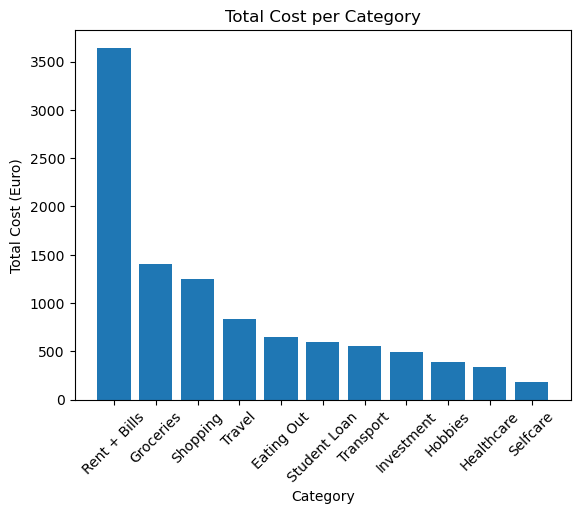

In [31]:
# Create a bar chart of the total cost for each category
fig, ax = plt.subplots()
ax.bar(category_costs.index, category_costs)

# Set the title and axis labels
ax.set_title('Total Cost per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Cost (Euro)')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

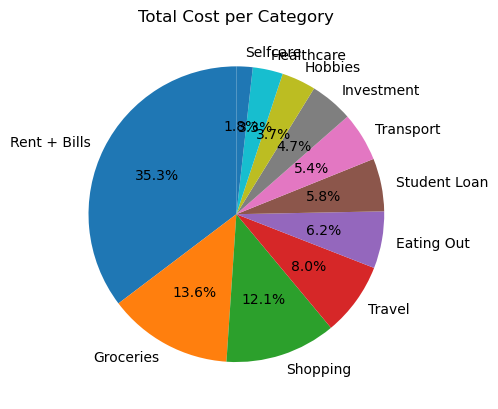

In [32]:
# Create a pie chart of the percentage of the total cost for each category
fig, ax = plt.subplots()
ax.pie(category_percentages, labels=category_costs.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Total Cost per Category')

# Show the plot
plt.show()

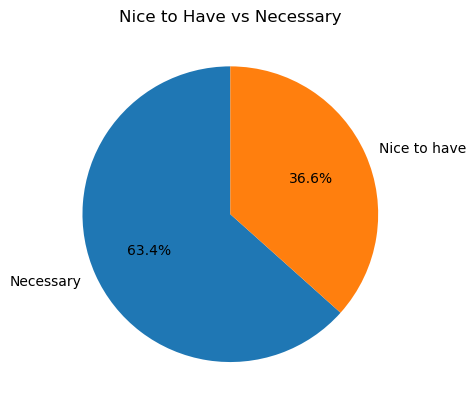

In [33]:
# Create a pie chart of the percentage of the Nice to Have vs Necessary
fig, ax = plt.subplots()
ax.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Nice to Have vs Necessary')

# Show the plot
plt.show()

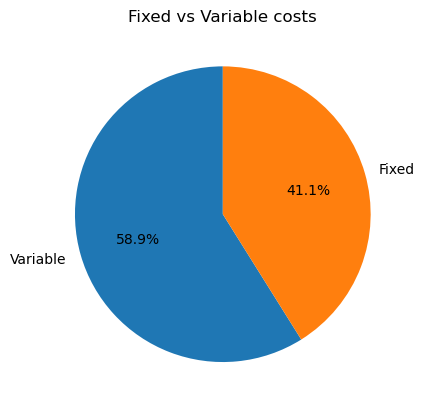

In [34]:
# Create a pie chart of the percentage of the variables vs fixed costs
fig, ax = plt.subplots()
ax.pie(classification_percentages, labels=classification_percentages.index, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Fixed vs Variable costs')

# Show the plot
plt.show()

#### Looking it at it in a month by month basis

In [35]:
# set date column as the index
df01.set_index('Date', inplace=True)

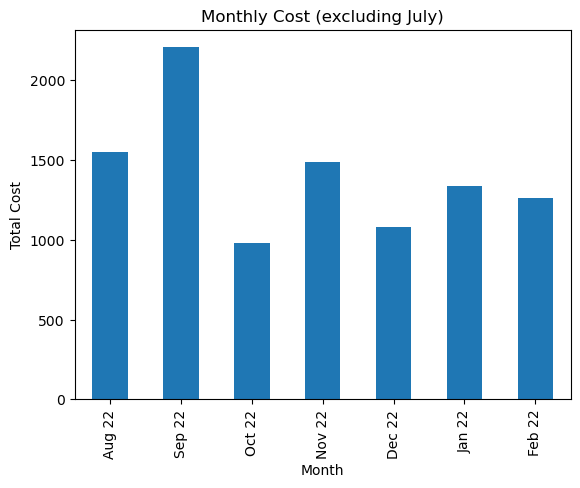

In [36]:
# groupby and sum by month, excluding July
monthly_cost = df01.loc[df01.index.month != 7, 'Cost'].resample('M').sum()

# modify the x-axis labels
x_labels = ['Aug 22', 'Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 22', 'Feb 22']

# plot the monthly cost as a bar chart
ax = monthly_cost.plot.bar(y=monthly_cost.values)

# set the x-axis tick labels
ax.set_xticklabels(x_labels)

# set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Total Cost')
ax.set_title('Monthly Cost (excluding July)')

# display the chart
plt.show()

In [37]:
order = ['Jul - Aug 22', 'Aug - Sep 22', 'Sep - Oct 22', 'Oct - Nov 22', 'Nov - Dec 22', 'Dec - Jan 22', 'Jan - Feb 23']
costs_by_month = df01.groupby(['Month_period'])['Cost'].sum().reindex(order)
costs_by_month

Month_period
Jul - Aug 22    1728.87
Aug - Sep 22    2276.55
Sep - Oct 22    1131.22
Oct - Nov 22    1265.33
Nov - Dec 22    1207.29
Dec - Jan 22    1203.47
Jan - Feb 23    1510.45
Name: Cost, dtype: float64

C:\Users\wasy\AppData\Local\Temp\ipykernel_5304\2352677396.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(costs_by_month.index, rotation='vertical')


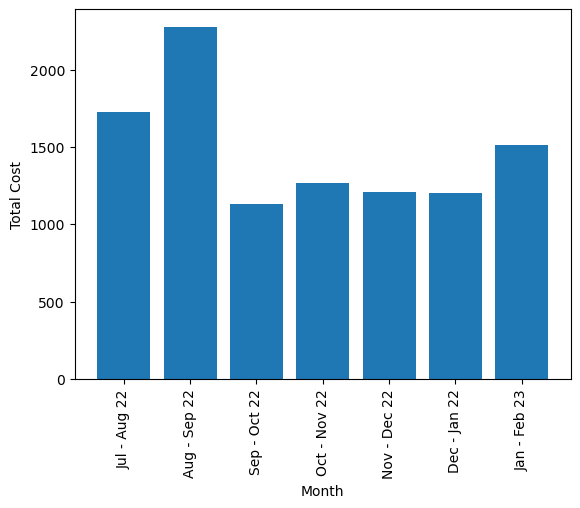

In [38]:
fig, ax = plt.subplots()
ax.bar(costs_by_month.index, costs_by_month.values)
ax.set_xticklabels(costs_by_month.index, rotation='vertical')
ax.set_xlabel('Month')
ax.set_ylabel('Total Cost')
plt.show()

In [39]:
# # stacked Bar Charts 

# - a bar chart per months and its composition (categories ? (Facetgrid???))
# - distribution over weeks
# - distribution per day?
# - which of the costs which is flexible is the most varying?

## Visuals (grouped Barcharts categorical SUM distribution per Months, Day; Weekday)

In [40]:
#reset index to get back to call date informations
df01.reset_index(inplace=True)

#adding additional columns for months & weekday
df01["Month"] = df01.Date.dt.month
df01["weekday"] = df01.Date.dt.day_of_week

In [41]:
# create a list of weekday conditions
conditions = [(df01['weekday'] <= 4),(df01['weekday'] > 4)]

# create a list of the values to be assigned
values = ['Weekday', 'Weekend']

# create a new column and use np.select to assign values to it using our lists as arguments
df01['Day_of_Week_Category'] = np.select(conditions, values)

# display updated DataFrame
df01.head()

,Date,Category,Detail,Cost,Classification,Type,Month_period,Month,weekday,Day_of_Week_Category
0,2022-07-25,Eating Out,Brunch,15.00,Variable,Nice to have,Jul - Aug 22,7,0,Weekday
1,2022-07-25,Shopping,Uniqlo,144.50,Variable,Nice to have,Jul - Aug 22,7,0,Weekday
2,2022-07-27,Hobbies,Salsa Class,130.00,Variable,Nice to have,Jul - Aug 22,7,2,Weekday
3,2022-07-27,Groceries,Groceries,6.78,Variable,Necessary,Jul - Aug 22,7,2,Weekday
4,2022-07-27,Eating Out,Ditsch,2.00,Variable,Nice to have,Jul - Aug 22,7,2,Weekday


In [42]:
df01.columns

Index(['Date', 'Category', 'Detail', 'Cost', 'Classification', 'Type',
       'Month_period', 'Month', 'weekday', 'Day_of_Week_Category'],
      dtype='object')

### Monthly SUM per Category

In [43]:
series01 = pd.DataFrame(df01.groupby(["Month","Category"])["Cost"].sum())
series01.reset_index(inplace=True)
series01

,Month,Category,Cost
0,1,Eating Out,11.00
1,1,Groceries,110.18
2,1,Healthcare,17.14
3,1,Hobbies,53.82
4,1,Rent + Bills,561.50
...,...,...,...
61,12,Groceries,175.45
62,12,Hobbies,37.82
63,12,Rent + Bills,579.31
64,12,Shopping,179.25


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (7).

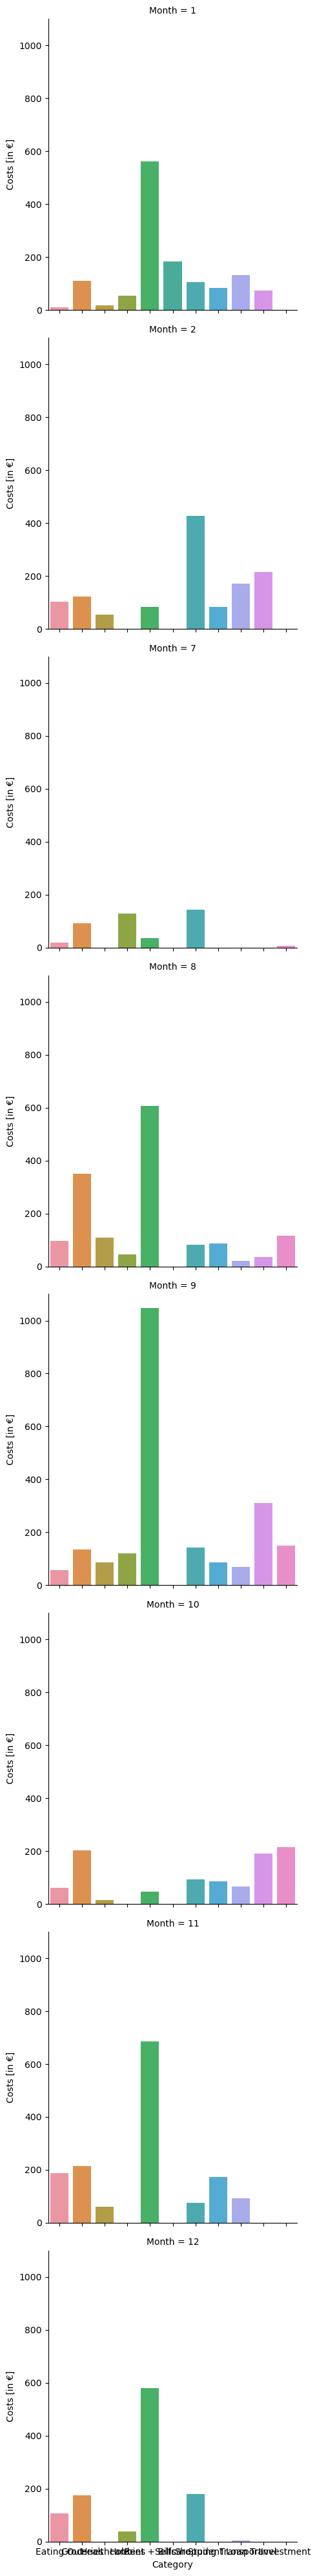

In [44]:
g = sns.catplot(series01, x="Category", y="Cost", hue="Category", row="Month", kind="bar",dodge=False,legend=False)
#ax.bar_label(ax.containers[0], labels=tb, padding=3)
for i in range(8):
    g.axes[i,0].set_ylabel("Costs [in €]")

g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(loc='upper right')

### Monthly SUM per Category and Weekday 

In [ ]:
#groupby Month and Category
series02 = pd.DataFrame(df01.groupby(["Month","weekday","Category"])["Cost"].sum())
series02.reset_index(inplace=True)

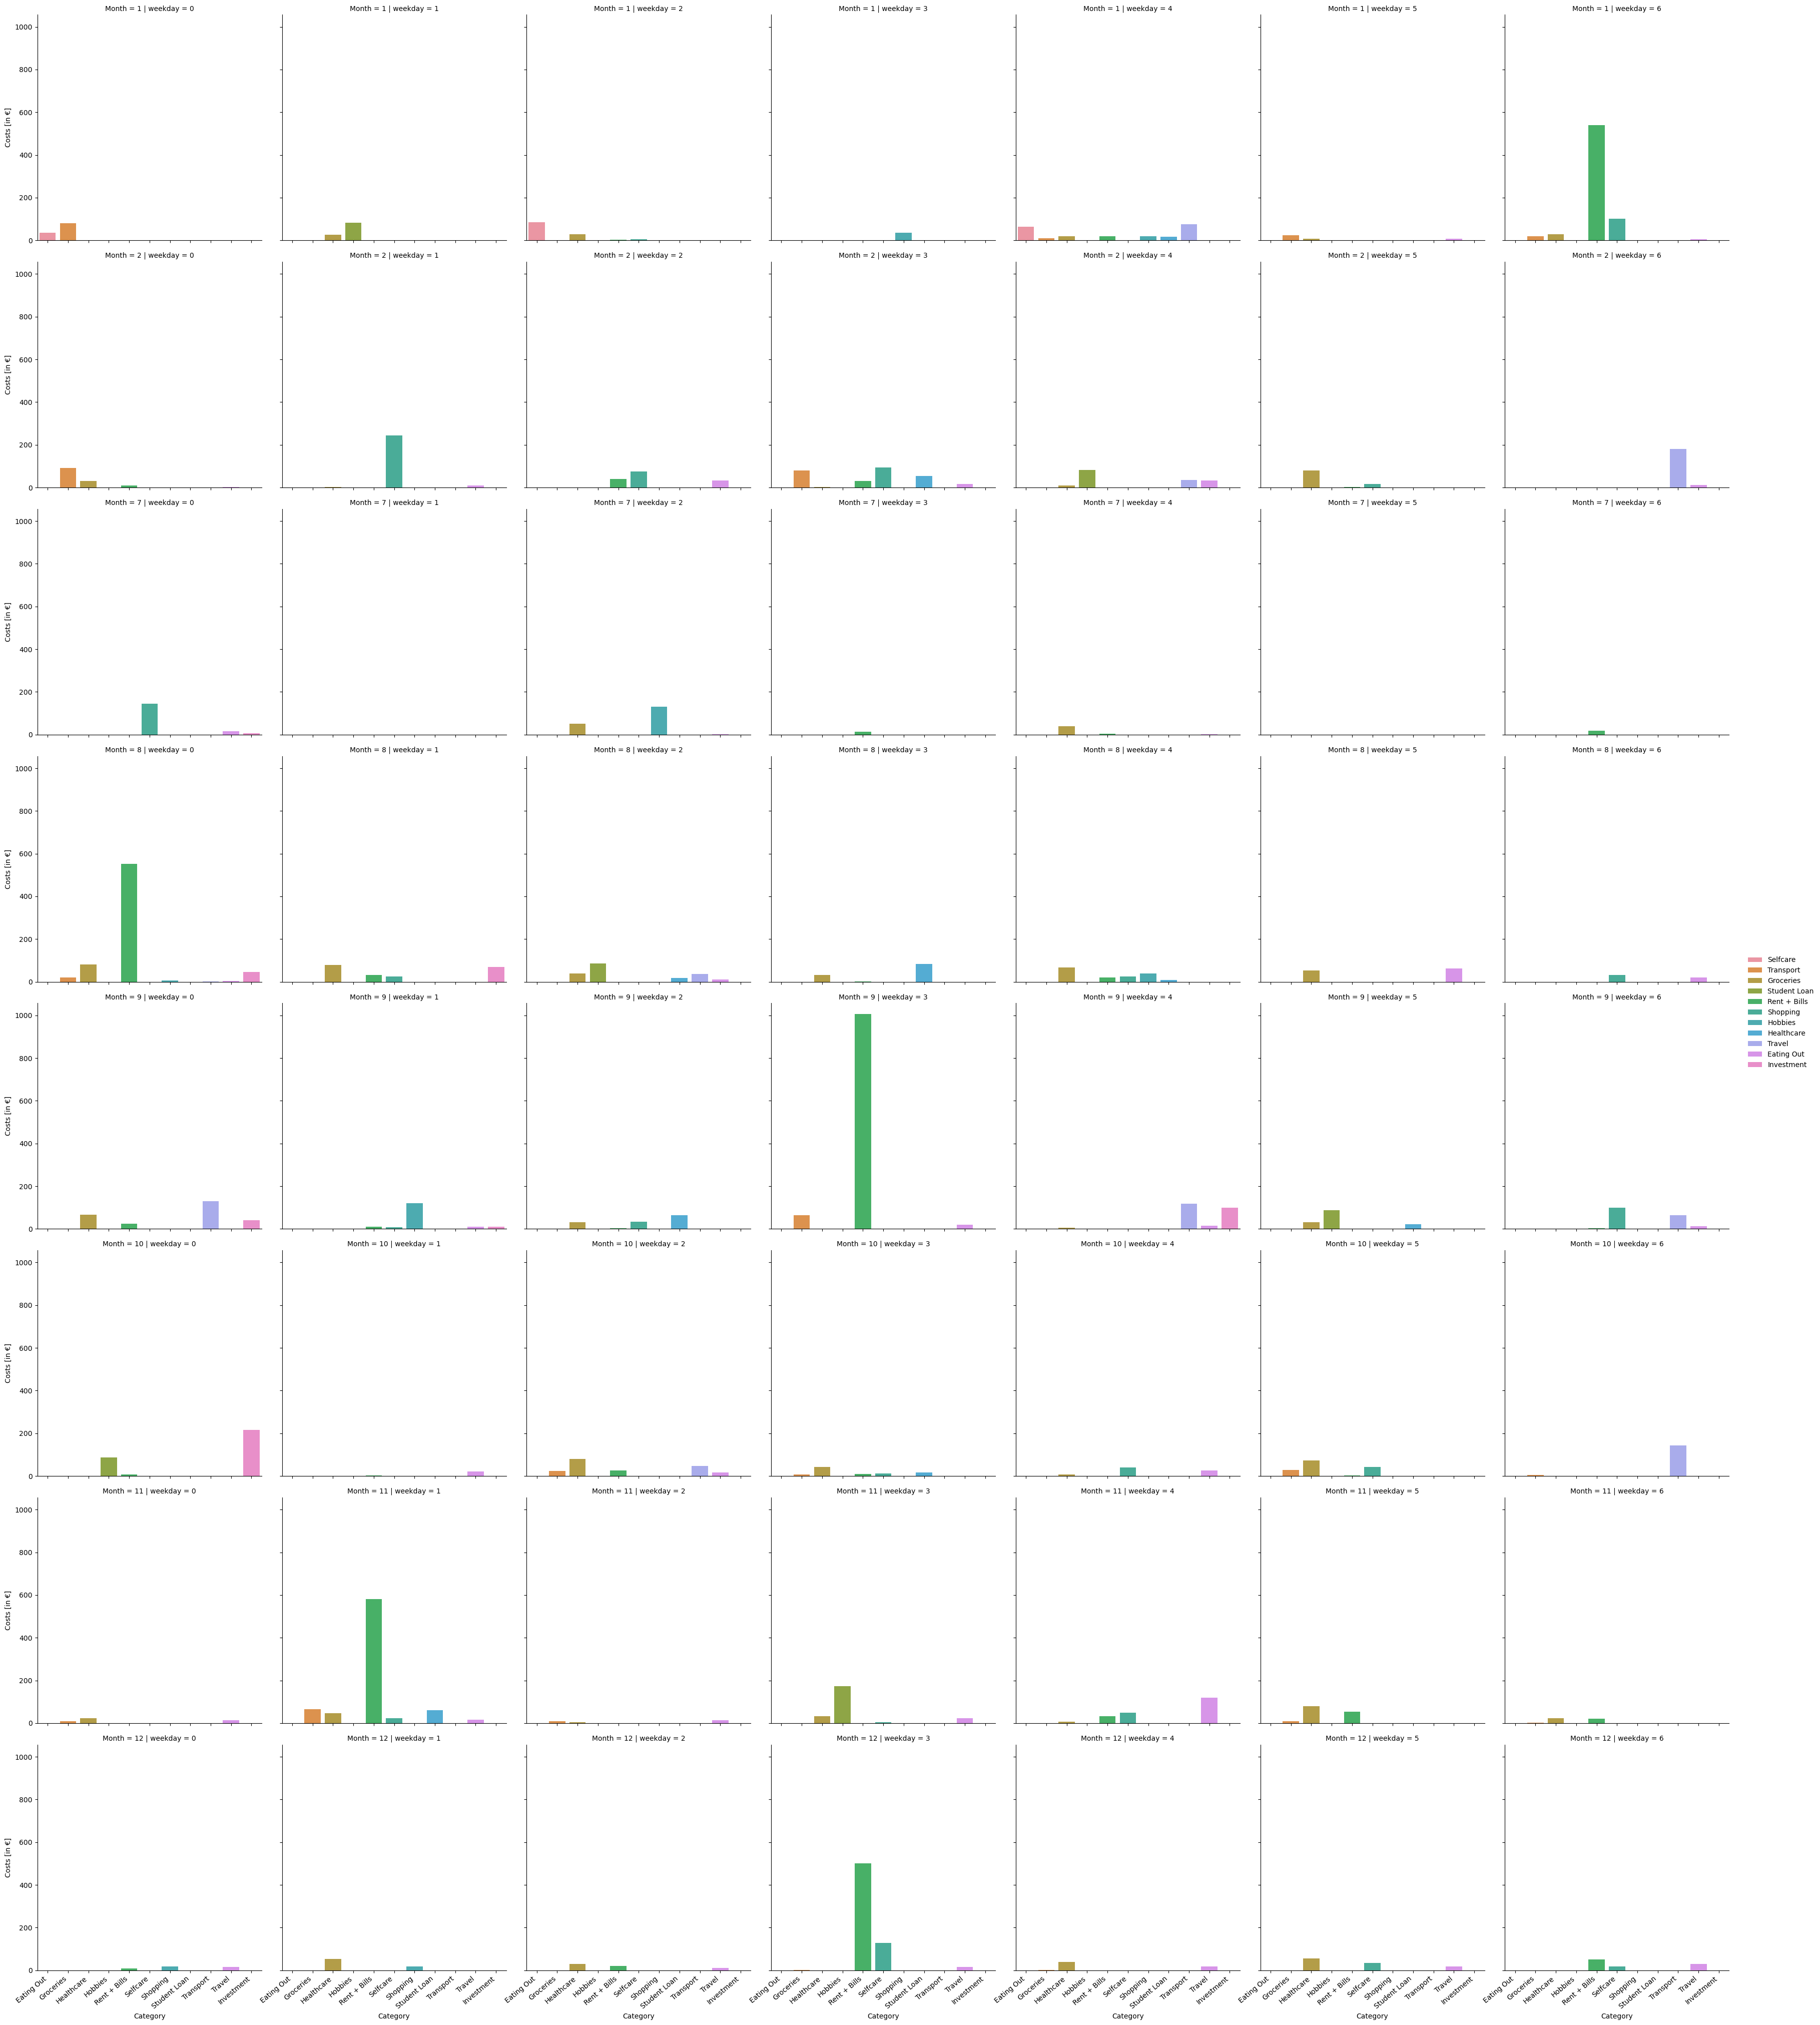

In [ ]:
g = sns.catplot(series02, x="Category", y="Cost", hue="Category", row="Month",col="weekday", kind="bar",dodge=False)
#ax.bar_label(ax.containers[0], labels=tb, padding=3)
for i in range(8):
    g.axes[i,0].set_ylabel("Costs [in €]")

g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.add_legend()

plotting spendings for each weekday does not yield a good result. A differentiation weekday vs. weekend might be the better go

### Monthly SUM per Category and Weekday Cat (Weekday vs. Weekend) 

In [1]:
#groupby Month and Category
series03 = pd.DataFrame(df01.groupby(["Month","Day_of_Week_Category","Category"])["Cost"].sum())
series03.reset_index(inplace=True)

NameError: name 'pd' is not defined

In [ ]:
series03.Month.unique()

array([ 1,  2,  7,  8,  9, 10, 11, 12], dtype=int64)

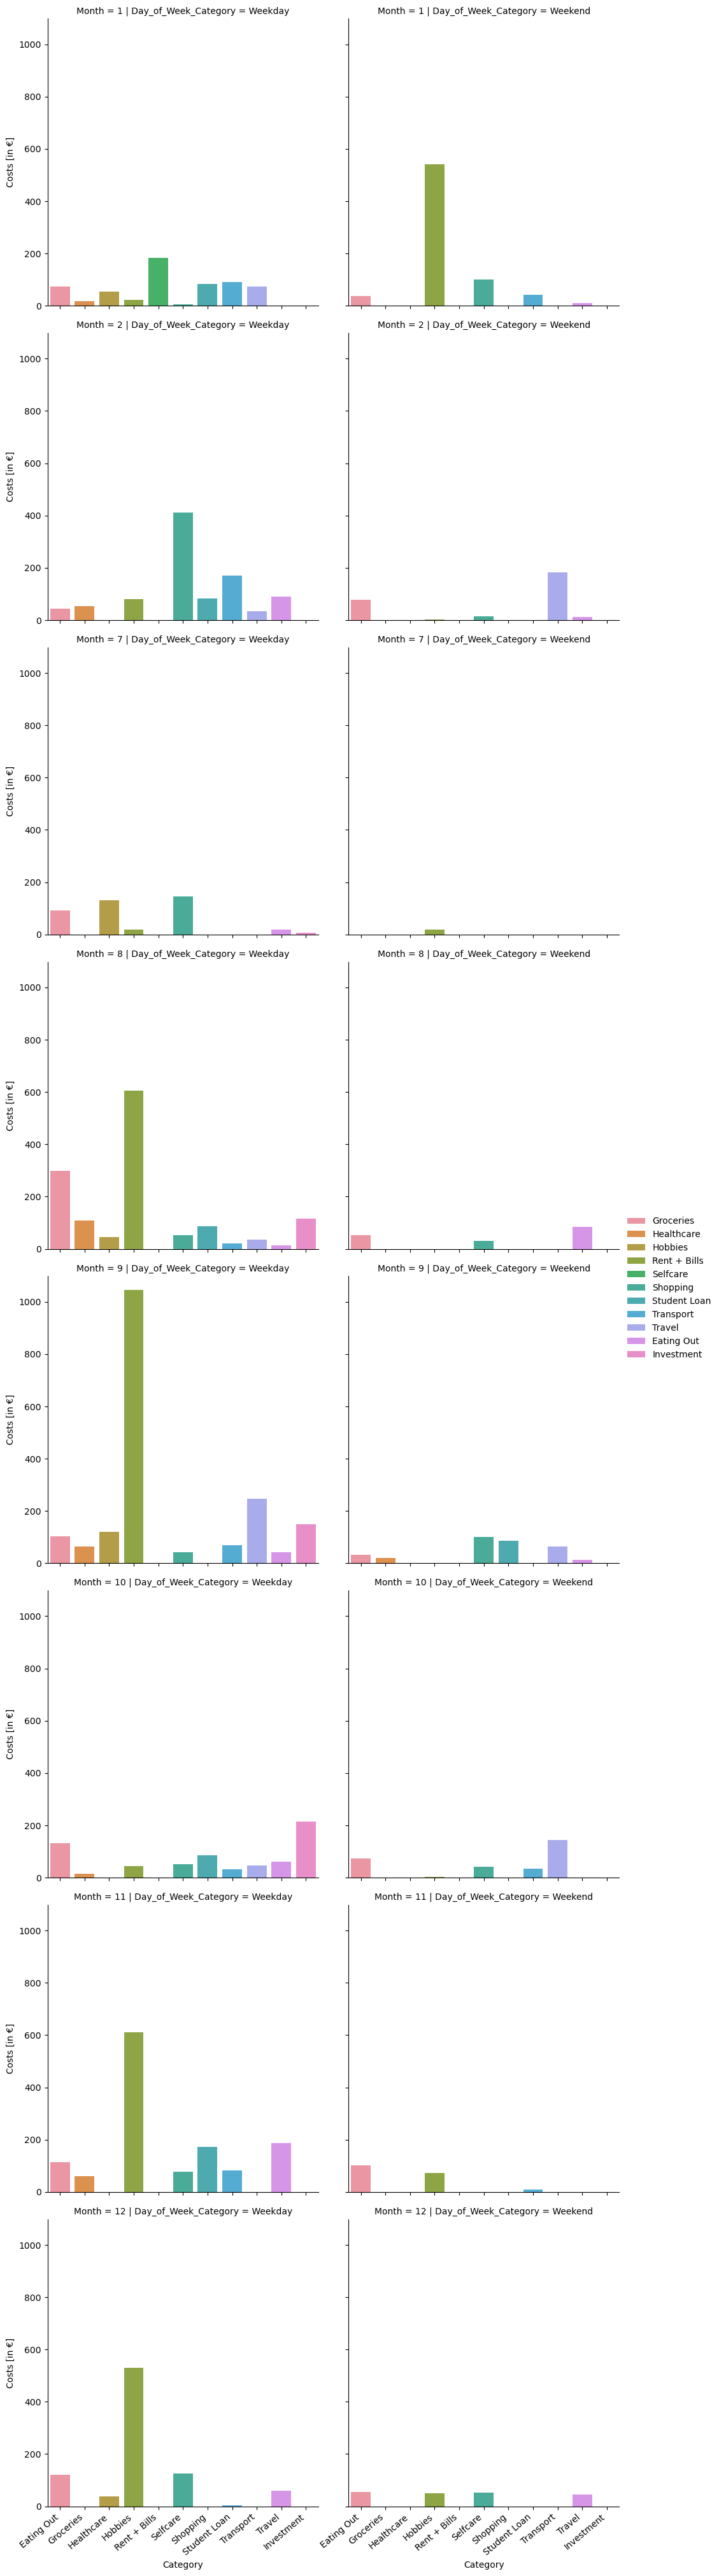

In [ ]:
g = sns.catplot(series03, x="Category", y="Cost", hue="Category", row="Month",col="Day_of_Week_Category", kind="bar",dodge=False)
#ax.bar_label(ax.containers[0], labels=tb, padding=3)
for i in range(8):
    g.axes[i,0].set_ylabel("Costs [in €]")

g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.add_legend()

In [ ]:
#example donut pie chart for a month

In [ ]:
filt_Oct = series01["Month"] == 10
series_Oct= series01[filt_Oct]
print(series_Oct)

In [ ]:
series_Oct = series_Oct.assign(Percentage = lambda x: (x['Cost'] /x["Cost"].sum())*100)
print(series_Oct)

    Month      Category    Cost  Percentage
44     10    Eating Out   61.64    6.306592
45     10     Groceries  203.45   20.815642
46     10    Healthcare   15.44    1.579717
47     10    Investment  215.00   21.997360
48     10  Rent + Bills   46.74    4.782124
49     10      Shopping   92.76    9.490582
50     10  Student Loan   86.40    8.839869
51     10     Transport   65.97    6.749609
52     10        Travel  189.99   19.438505


In [ ]:
values_PieChart = round(series_Oct.Percentage,2).to_list()

In [ ]:
Cat_names = series_Oct.Category.to_list()

In [ ]:
values_PieChart

[6.31, 20.82, 1.58, 22.0, 4.78, 9.49, 8.84, 6.75, 19.44]

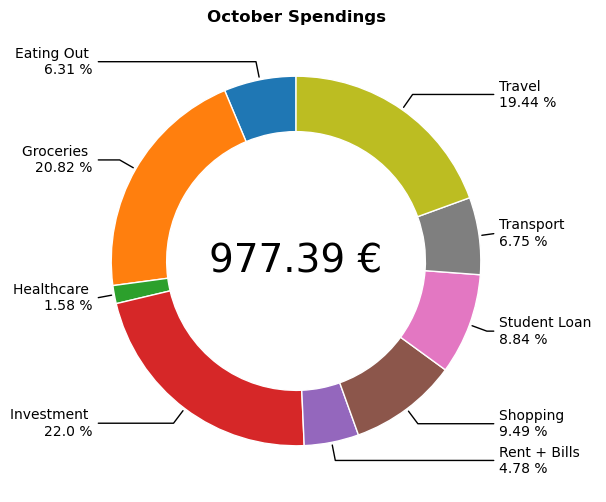

In [ ]:
#sample plot
fig, ax = plt.subplots(figsize=(6, 6))
wedgeprops = {'width':0.3, 'edgecolor':'white', 'linewidth':1}
wedges,texts = ax.pie([6.31, 20.82, 1.58, 22.0, 4.78, 9.49, 8.84, 6.75, 19.44], wedgeprops=wedgeprops, startangle=90)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("%s \n%s %s" %(Cat_names[i],values_PieChart[i],"%"), xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

#plt.title('September Spendings', fontsize=24, loc='center')
plt.text(0, 0, "%s €" %(series_Oct.Cost.sum(),), ha='center', va='center', fontsize=28)
plt.title("October Spendings",fontweight="bold")
plt.show()